In [1]:
# Regularization for Polynomial Regression

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# allow plots to appear in the notebook
%matplotlib inline

## Brain and body weight Dataset

This is a [dataset](http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt) of the average weight of the body and the brain for 62 mammal species. Let's read it into pandas and take a quick look:

In [3]:
df = pd.read_table('./Datasets/Brain_Body.txt', sep='\s+', skiprows=33, names=['id','brain','body'], index_col='id')
df.head()

,brain,body
id,,
1,3.385,44.5
2,0.480,15.5
3,1.350,8.1
4,465.000,423.0
5,36.330,119.5


In [4]:
df.describe()

,brain,body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


We're going to focus on a smaller subset in which the body weight is less than 200:

In [5]:
# only keep rows in which the body weight is less than 200
df = df[df.body < 200]
df.shape

(51, 2)

In [6]:
X = df[['body']].values
y = df['brain'].values

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

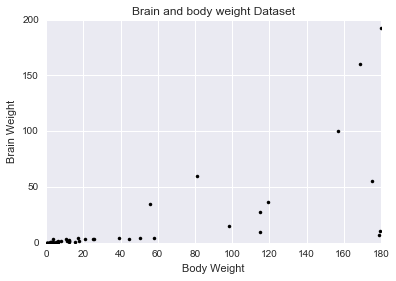

In [8]:
plt.figure()
plt.title('Brain and body weight Dataset')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.plot(X, y, 'k.')
plt.grid(True)
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

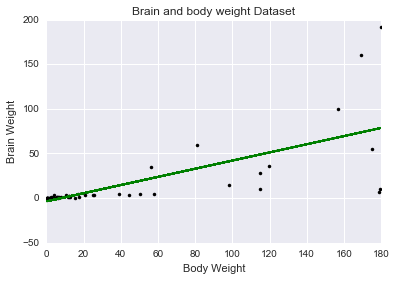

In [11]:
plt.figure()
plt.title('Brain and body weight Dataset')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.plot(X, y, 'k.')
plt.plot(X, model.predict(X),'g')
plt.grid(True)
plt.show()

In [12]:
# calculate RMSE
from sklearn import metrics
import numpy as np
print (np.sqrt(metrics.mean_squared_error(y,model.predict(X))))

26.6991260094


In [13]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print (np.sqrt(metrics.mean_squared_error(y_test,model.predict(X_test))))

26.07743984


## Polynomial Regression

In [16]:
def fit_polynomial(X, y, degree):
    '''
    Fits a polynomial to the input sample.
    (x,y): input sample
    degree: polynomial degree
    '''
    model = LinearRegression()
    model.fit(np.vander(X, degree + 1), y)
    plt.figure()
    plt.title('Brain and body weight Dataset')
    plt.xlabel('Body Weight')
    plt.ylabel('Brain Weight')
    plt.plot(X, y, 'k.')
    plt.plot(X,model.predict(np.vander(X, degree + 1)),'g.')
    plt.grid(True)
    plt.show()
    print (np.sqrt(metrics.mean_squared_error(y,model.predict((np.vander(X, degree + 1))    ))))

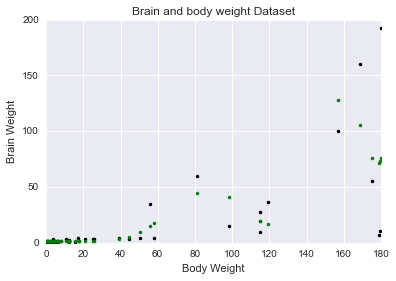

23.4318669425


In [17]:
X=np.ravel(X)
y=np.ravel(y)

fit_polynomial(X, y,10)